In [34]:
#%run "/Users/cloclo/Desktop/Python/Accidents-corporels/Ouverture_donnees.ipynb"
#%run "/Users/Pauline/Documents/GitHub/Accidents-corporels/Ouverture_donnees.ipynb"
%run "./Ouverture_donnees.ipynb"

./Ouverture_donnees.ipynb:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/cloclo/.local/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
import seaborn as sns
import plotly.express as px
import datetime

## Outils statistiques et graphiques

#### Diagrammes en bar

In [47]:
def diag_barres_gravite(df, variable) :
    df_crosstab = pd.crosstab(df[variable], df.gravite).reset_index().melt(id_vars=[variable], value_vars=[1, 2], var_name = "gravite", value_name = "Nombre d'accidents")
    sns.barplot(x=variable, y="Nombre d'accidents", data=df_crosstab, hue = "gravite", dodge=True, palette = "pastel")

In [48]:
def diag_barres_gravite_cumulees(df, variable) :
    df_crosstab = pd.crosstab(df[variable], df.gravite, normalize = "index").reset_index().set_index(variable)
    df_crosstab.plot(kind = "bar", stacked=True, color = ["blue", "red"])

In [49]:
def diag_barres_interactif(df, variable) :
    df_crosstab = pd.crosstab(df[variable], df.gravite, normalize = "index").reset_index().melt(id_vars=[variable], value_vars=[1, 2], var_name = "gravite", value_name = "Nombre d'accidents")
    df_crosstab["Nombre d'accidents"] = (df_crosstab["Nombre d'accidents"]*100).round(2)
    fig = px.bar(df_crosstab, x=variable, y="Nombre d'accidents", color="gravite", width = 400, height = 400)
    fig.show()

In [50]:
def diag_barres_interactif_usagers(df, variable) :
    df_crosstab = pd.crosstab(df[variable], df.grav, normalize = "index").reset_index().melt(id_vars=[variable], value_vars=["Blesse hospitalise", "Blesse leger", "Indemne", "Tue"], var_name = "gravite", value_name = "Nombre d'usagers")
    df_crosstab["Nombre d'usagers"] = (df_crosstab["Nombre d'usagers"]*100).round(2)
    fig = px.bar(df_crosstab, x=variable, y="Nombre d'usagers", color="gravite", width = 400, height = 400)
    fig.show()

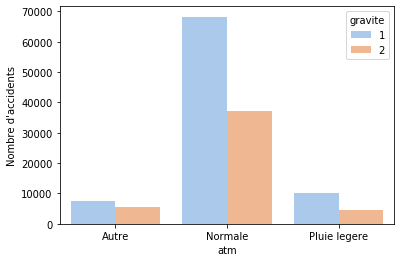

In [52]:
diag_barres_gravite(df, "atm")

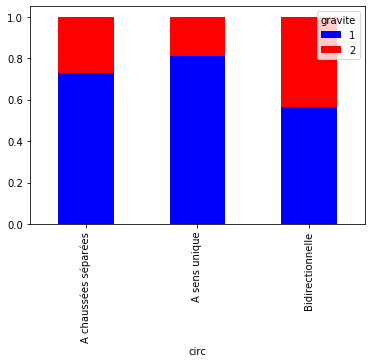

In [53]:
diag_barres_gravite_cumulees(df_accidents, "circ")

#### Camemberts

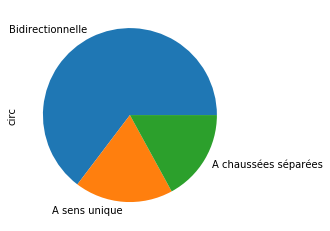

In [54]:
df.circ.value_counts().plot.pie()

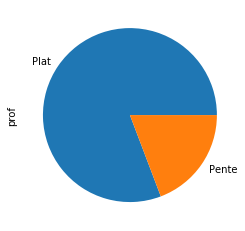

In [55]:
df.prof.value_counts().plot.pie()

## METEO

In [106]:
df_accidents["mois"] = df_accidents["mois"].astype(int)
df_accidents["jour"] = df_accidents["jour"].astype(int)

index = [i for i in range(df_accidents.shape[0])]
df_accidents.index = index

In [107]:
df_accidents = df_accidents.assign(date=0)
for i in range (df_accidents.shape[0]) :
    df_accidents["date"][i] = datetime.date(2019, df_accidents["mois"][i], df_accidents["jour"][i])

/Users/cloclo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [145]:
df_accidents = df_accidents.assign(accident=1)
df_date = df_accidents.groupby('date').agg({"accident" : 'sum'}).reset_index()
df_date_grav1 = df_accidents[df_accidents.gravite==1].groupby('date').agg({"accident" : 'sum'}).reset_index()
df_date_grav2 = df_accidents[df_accidents.gravite==2].groupby('date').agg({"accident" : 'sum'}).reset_index()
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x='date', y = 'accident', data = df_date, color = 'blue')
sns.lineplot(x='date', y = 'accident', data = df_date_grav1, color = 'green', dashes=True)
sns.lineplot(x='date', y = 'accident', data = df_date_grav2, color = 'red')

KeyError: 'date'

Le grand pic correspond au 20 décembre.

In [135]:
#diag_barres_interactif(df_accidents, "atm")
#diag_barres_interactif(df_accidents, "surf")

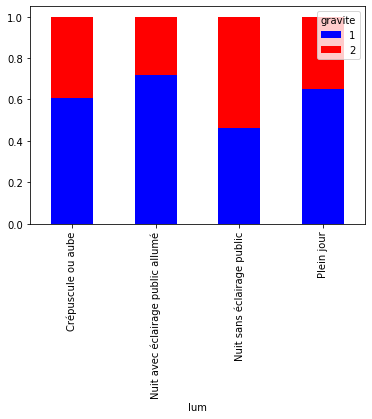

In [59]:
diag_barres_gravite_cumulees(df_accidents, "lum")

## USAGERS

En pourcentage, les conducteurs sortent plus indemnes des accidents que les passagers. \
Il y a une surreprésentation des blessés (légers et hospitalisés) et des tués chez les piétons. Cela semble logique puisqu'un piéton est plus vulnérable.

In [45]:
diag_barres_interactif_usagers(df_usagers, "catu")

In [46]:
diag_barres_interactif_usagers(df_usagers, "sexe")

In [58]:
diag_barres_interactif_usagers(df, "age")

In [33]:
#diag_barres_interactif_usagers(df_usagers, "trajet")

## STYLE DE CONDUITE

## ROUTE

## ACCIDENTS